In [52]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio

In [73]:
# Define filepath
filepath = '/home/johnny/Documents/Teaching/490_Geospatial_Data_Science_Applications/Course/labs/lab4/data/landsat/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + '*.tif'))

files

Next, open a single band from your Landsat scene. 

In [70]:
# Open a single band
src = rasterio.open(files[0])
band_1 = src.read(1)

In [69]:
array.shape

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 7350, 7394, 7301],
       [   0,    0,    0, ..., 7381, 7427, 7289],
       [   0,    0,    0, ..., 7435, 7322, 7382]], dtype=uint16)

Let's plot the data so we know what we're looking at.

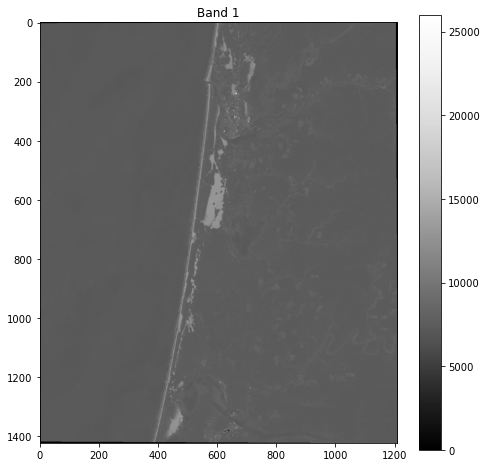

In [71]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(8,8))
im = ax1.imshow(band_1, cmap="Greys_r")
ax1.set_title("Band 1")
plt.colorbar(im, orientation='vertical')
plt.show()

We often stack Landsat bands so we can conduct our analysis on all bands at the same time. The code below takes each band that you opened, and stacks it into a new single output array. 

In [78]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

In [79]:
all_bands.shape

(1422, 1208, 7)

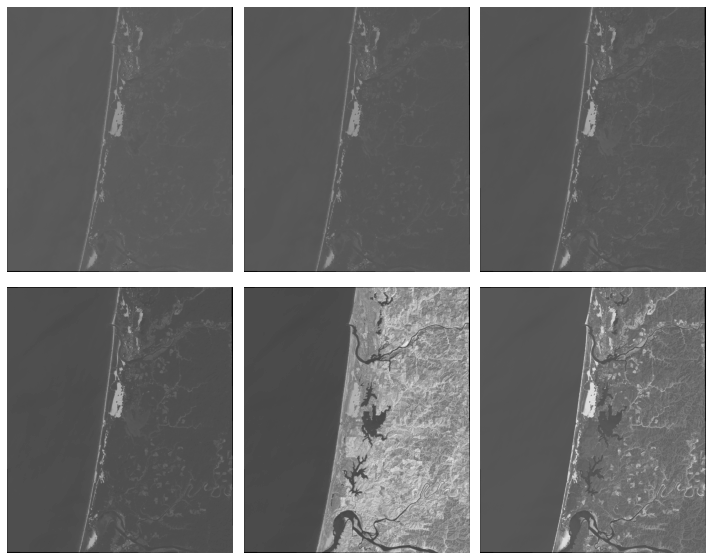

In [108]:
# Plot all data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
ax1.imshow(all_bands[:,:,0], cmap="Greys_r")
ax2.imshow(all_bands[:,:,1], cmap="Greys_r")
ax3.imshow(all_bands[:,:,2], cmap="Greys_r")
ax4.imshow(all_bands[:,:,3], cmap="Greys_r")
ax5.imshow(all_bands[:,:,4], cmap="Greys_r")
ax6.imshow(all_bands[:,:,5], cmap="Greys_r")
ax7.imshow(all_bands[:,:,6], cmap="Greys_r")
for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.set_axis_off()
plt.tight_layout()

Write stacked array to GeoTIFF

In [103]:
# Write an array as a raster band to a new 16-bit file. For the new file's profile, 
# we start with the profile of the source
profile = src.profile

# And then change the band count to 7, set the dtype to uint16, and specify LZW compression.
profile.update(
    dtype=rasterio.uint16,
    count=7,
    compress='lzw')

In [107]:
with rasterio.open(filepath + 'stacked.tif', 'w', **profile) as dst:
    # Write array
    dst.write(np.rollaxis(all_bands, axis=2)) # Note that array needs to be in bands, rows, cols order (z, y, x)